In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data Set

In [2]:
# Import cardiac data
cardiac_data = pd.read_csv(
    "cardiacData.csv", 
    header = -1, 
    names = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ])
cardiac_data.iloc[:, [0, 1, 2, 3, 4]].values
pd.set_option('display.max_rows', 10)
pd.DataFrame(cardiac_data)

,HR,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0
...,...,...,...,...,...
245,97,1,87,0,1
246,78,0,79,0,0
247,66,0,89,0,0
248,71,0,68,0,0


# Find K

## Elbow Method (Sum of Squared Errors)

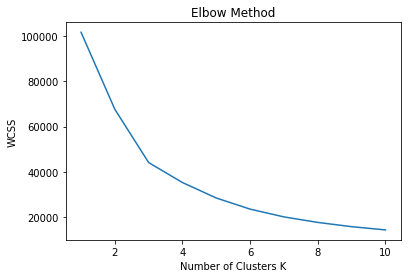

In [3]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cardiac_data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
# Average Within Cluster Distances to Centroid
# or Within Cluster Sum of Squares
plt.ylabel('WCSS')
plt.show()